In [1]:
 # Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
from numpy.random import seed
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


seed(1)

type1_array = []
legendary_array = []

pokedex = pd.read_csv('Pokemon.csv')
pokedex.head()


y = pokedex['Legendary']
y2 = pokedex['Type 1']

X = pokedex.drop("Legendary", axis=1)
X = X.drop("#", axis=1)
X = X.drop("Name", axis=1)
X = X.drop("Type 1", axis=1)
X = X.drop("Type 2", axis=1)
X.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [2]:
# All Models - Type 1

scores = []
for i in range(0,1):
    #Neural Network
    X_train, X_test, y_train, y_test = train_test_split(X, y2, stratify=y2, random_state=i)
    X_scaler = StandardScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    label_encoder = LabelEncoder()

    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.fit_transform(y_test)

    y_train_categorical = to_categorical(y_train)
    y_test_categorical = to_categorical(y_test)
    
    model = Sequential()
    model.add(Dense(units=6, activation='relu', input_dim=8))
    model.add(Dense(units=18, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    history = model.fit(
        X_train_scaled,
        y_train_categorical,
        epochs=100,
        shuffle = True,
        verbose = 0,
        validation_data=(X_test_scaled,y_test_categorical)
    )
    model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=0)
    

    #scores.append(model_accuracy)
    print('NN Test Acc: %.3f' % model_accuracy)
    
    #KNN 
    knn = KNeighborsClassifier(n_neighbors=17)
    knn.fit(X_train_scaled, y_train)
    knn_score = knn.score(X_test_scaled, y_test)
    #scores.append(knn_score)
    print('KNN Test Acc: %.3f' % knn_score)
    
    #Random Forest
    
    rf = RandomForestClassifier (n_estimators=300)
    rf = rf.fit(X_train, y_train)
    rf_score = rf.score(X_test, y_test)
    
    #scores.append(rf_score)
    print('RF Test Acc: %.3f' % rf_score)
    
    # SVM
    
    svm_model = SVC(kernel='linear')

    svm_model.fit(X_train, y_train)
    
    SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)
    
    svm_score = svm_model.score(X_test, y_test)
    
    print('SVM Test Acc: %.3f' % svm_score)
    

    
    type1_array.append([model_accuracy, knn_score, rf_score, svm_score])


type1_df = pd.DataFrame(type1_array, columns = ['Neural Network', 'KNN', 'Random Forest', 'SVM'])

type1_df.to_csv('type1_models.csv')

type1_df.head()

NN Test Acc: 0.245
KNN Test Acc: 0.195
RF Test Acc: 0.235
SVM Test Acc: 0.265


,Neural Network,KNN,Random Forest,SVM
0,0.245,0.195,0.235,0.265


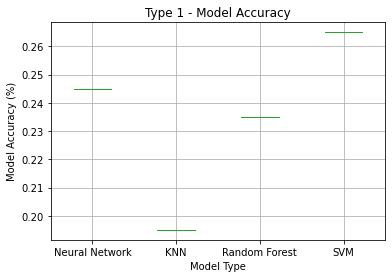

In [3]:
boxplot = type1_df.boxplot(column=['Neural Network', 'KNN', 'Random Forest', 'SVM'])

boxplot.set_title('Type 1 - Model Accuracy')
boxplot.set_xlabel('Model Type')
boxplot.set_ylabel('Model Accuracy (%)')


boxplot.figure.savefig('type1_accuracy.png')

In [4]:
# Comparison of Predictions By Type 1
predictions = pokedex[['Name',"Type 1"]]
# KNN Predictions
predicted_class_knn = label_encoder.inverse_transform(knn.predict(X_scaler.transform(X)))
# Neural Network Predictions
predicted_class_nn = label_encoder.inverse_transform(model.predict_classes(X_scaler.transform(X)))
# Random Forest Predictions
predicted_class_rf = label_encoder.inverse_transform(rf.predict(X))
# SVM Predictions
predicted_class_svm = label_encoder.inverse_transform(svm_model.predict(X))
# Creating a dataframe to compare data
predictions['KNN Prediction'] = predicted_class_knn
predictions['Neural Network Prediction'] = predicted_class_nn
predictions['Random Forest Preduction'] = predicted_class_rf
predictions['SVM Prediction'] = predicted_class_svm


predictions.to_csv('type1_predictions_accuracy.csv')

predictions.head(40)

/Users/danielbernal/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
<ipython-input-4-6deeef706ece>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['KNN Prediction'] = predicted_class_knn
<ipython-input-4-6deeef706ece>:1

,Name,Type 1,KNN Prediction,Neural Network Prediction,Random Forest Preduction,SVM Prediction
0,Bulbasaur,Grass,Fire,Water,Grass,Water
1,Ivysaur,Grass,Bug,Water,Grass,Water
2,Venusaur,Grass,Water,Water,Grass,Water
3,VenusaurMega Venusaur,Grass,Fire,Water,Grass,Water
4,Charmander,Fire,Water,Water,Fire,Water
5,Charmeleon,Fire,Fire,Water,Fire,Water
6,Charizard,Fire,Fire,Water,Fire,Water
7,CharizardMega Charizard X,Fire,Fire,Water,Fire,Fire
8,CharizardMega Charizard Y,Fire,Fire,Psychic,Fire,Psychic
9,Squirtle,Water,Water,Water,Water,Water


In [5]:
# All Models - Legendary Status

scores = []
for i in range(0,1):
    #Neural Network
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=i)
    X_scaler = StandardScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    label_encoder = LabelEncoder()


    y_train_categorical = to_categorical(y_train)
    y_test_categorical = to_categorical(y_test)
    
    model = Sequential()
    model.add(Dense(units=6, activation='relu', input_dim=8))
    model.add(Dense(units=2, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    history = model.fit(
        X_train_scaled,
        y_train_categorical,
        epochs=100,
        shuffle = True,
        verbose = 0,
        validation_data=(X_test_scaled,y_test_categorical)
    )
    model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=0)
    

    print('NN Test Acc: %.3f' % model_accuracy)
    
    #KNN 
    
    knn = KNeighborsClassifier(n_neighbors=17)
    knn.fit(X_train_scaled, y_train)
    knn_score = knn.score(X_test_scaled, y_test)
    print('KNN Test Acc: %.3f' % knn_score)
    
    #Random Forest
    
    rf = RandomForestClassifier (n_estimators=300)
    rf = rf.fit(X_train, y_train)
    rf_score = rf.score(X_test, y_test)
    
    print('RF Test Acc: %.3f' % rf_score)
    
    # SVM
    
    svm_model = SVC(kernel='linear')

    svm_model.fit(X_train, y_train)
    SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)
    
    svm_score = svm_model.score(X_test, y_test)
    
    print('SVM Test Acc: %.3f' % svm_score)
    

    
    legendary_array.append([model_accuracy, knn_score, rf_score, svm_score])


legendary_df = pd.DataFrame(legendary_array, columns = ['Neural Network', 'KNN', 'Random Forest', 'SVM'])

legendary_df.to_csv('lengendary_models.csv')

legendary_df.head()

NN Test Acc: 0.955
KNN Test Acc: 0.945
RF Test Acc: 0.950
SVM Test Acc: 0.940


,Neural Network,KNN,Random Forest,SVM
0,0.955,0.945,0.95,0.94


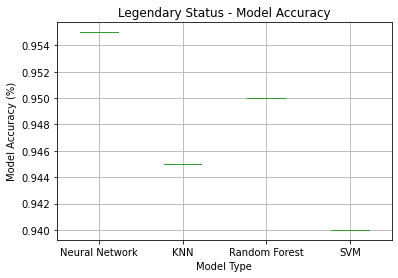

In [6]:
boxplot = legendary_df.boxplot(column=['Neural Network', 'KNN', 'Random Forest', 'SVM'])

boxplot.set_title('Legendary Status - Model Accuracy')
boxplot.set_xlabel('Model Type')
boxplot.set_ylabel('Model Accuracy (%)')

boxplot.figure.savefig('legendary_accuracy.png')


In [7]:
# Comparison of Predictions By Type 1
predictions = pokedex[['Name',"Legendary"]]
# KNN Predictions
predicted_class_knn = knn.predict(X_scaler.transform(X))
# Neural Network Predictions
predicted_class_nn = model.predict_classes(X_scaler.transform(X))
# Random Forest Predictions
predicted_class_rf = rf.predict(X)
# SVM Predictions
predicted_class_svm = svm_model.predict(X)
# Creating a dataframe to compare data
predictions['KNN Prediction'] = predicted_class_knn
predictions['Neural Network Prediction'] = predicted_class_nn
predictions['Random Forest Preduction'] = predicted_class_rf
predictions['SVM Prediction'] = predicted_class_svm


predictions.to_csv('legendary_predictions_accuracy.csv')

predictions.head(40)

/Users/danielbernal/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
<ipython-input-7-a19409ce60a6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['KNN Prediction'] = predicted_class_knn
<ipython-input-7-a19409ce60a6>:1

,Name,Legendary,KNN Prediction,Neural Network Prediction,Random Forest Preduction,SVM Prediction
0,Bulbasaur,False,False,0,False,False
1,Ivysaur,False,False,0,False,False
2,Venusaur,False,False,0,False,False
3,VenusaurMega Venusaur,False,False,0,False,False
4,Charmander,False,False,0,False,False
5,Charmeleon,False,False,0,False,False
6,Charizard,False,False,0,False,False
7,CharizardMega Charizard X,False,False,0,False,False
8,CharizardMega Charizard Y,False,False,0,False,False
9,Squirtle,False,False,0,False,False
